In [1]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation


/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)

In [3]:
file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_year_mean_mv.nc'
# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_year_mean_mv.nc'
# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5.nc'
year_for_basic_comparison = 2009

In [4]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_year_mean.nc','sea_surface_temperature')
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2008_all_tm.nc','sea_surface_temperature')

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [5]:
obs_cube_all = obs_cube_all
try:
    iris.coord_categorisation.add_year(obs_cube_all, 'time', name='year')
except:
    pass

print obs_cube_all.coord('year').points

obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]
obs_cube = obs_cube.collapsed('time',iris.analysis.MEAN)
# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]



[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]


/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'year'.
  warnings.warn(msg.format(self.name()))


In [6]:
# cube = iris.load_cube(file)[0]

cube_all = iris.load_cube(file)
try:
    iris.coord_categorisation.add_year(cube_all, 'time', name='year')
except:
    pass

cube_all = cube_all.aggregated_by('year', iris.analysis.MEAN)


cube_all.coord('longitude').points = cube_all.coord('longitude').points+180
# cube_all.data = np.ma.masked_array(cube_all.data)
# cube_all.data.fill_value = 9.96920997e+36
# cube_all.data = np.ma.masked_where(cube_all.data == 9.96920997e+36, cube_all.data)
# iris.coord_categorisation.add_year(cube_all, 'time', name='year')
cube = cube_all[np.where(cube_all.coord('year').points == year_for_basic_comparison)]
cube = cube.collapsed('time',iris.analysis.MEAN)

In [7]:
# cube = iris.load_cube(file)
# cube.coord('longitude').points = cube.coord('longitude').points+180
# cube = cube.collapsed('time',iris.analysis.MEAN)

In [8]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

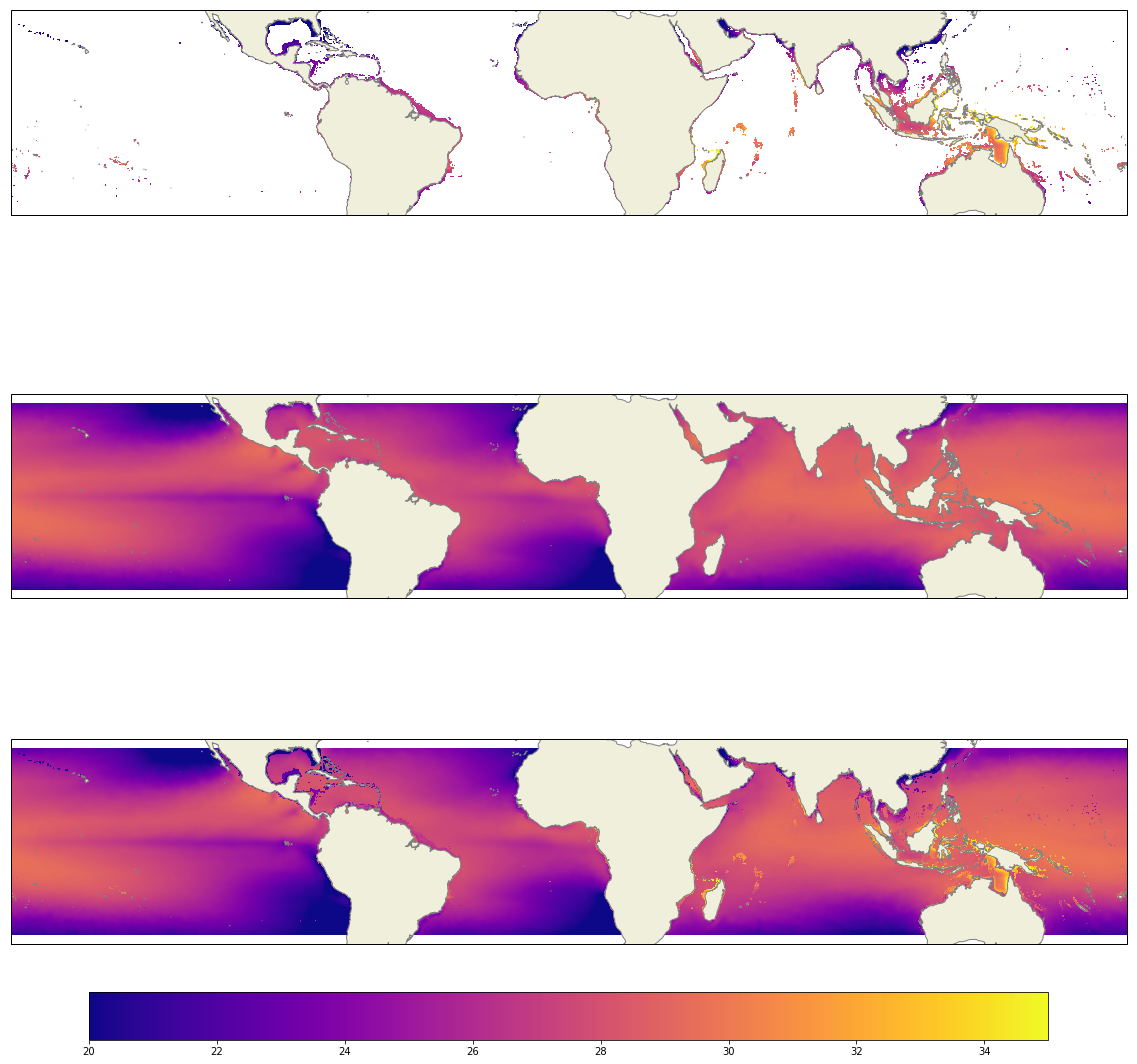

In [9]:
cube_0 = cube.copy()
cube_0_data = cube_0.data
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

#########

lon_west = -180
lon_east = 180
lat_south = -30.0
lat_north = 30.0

obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

obs_cube_data = obs_cube_region.data
lat2 = obs_cube_region.coord('latitude').points
lon2 = obs_cube_region.coord('longitude').points

ax = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

####

ax = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
p = ax.pcolormesh(lon, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

# plt.gca().coastlines('10m')
plt.colorbar(p,orientation='horizontal')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/global_s2p3.png',dpi=600)
plt.show()

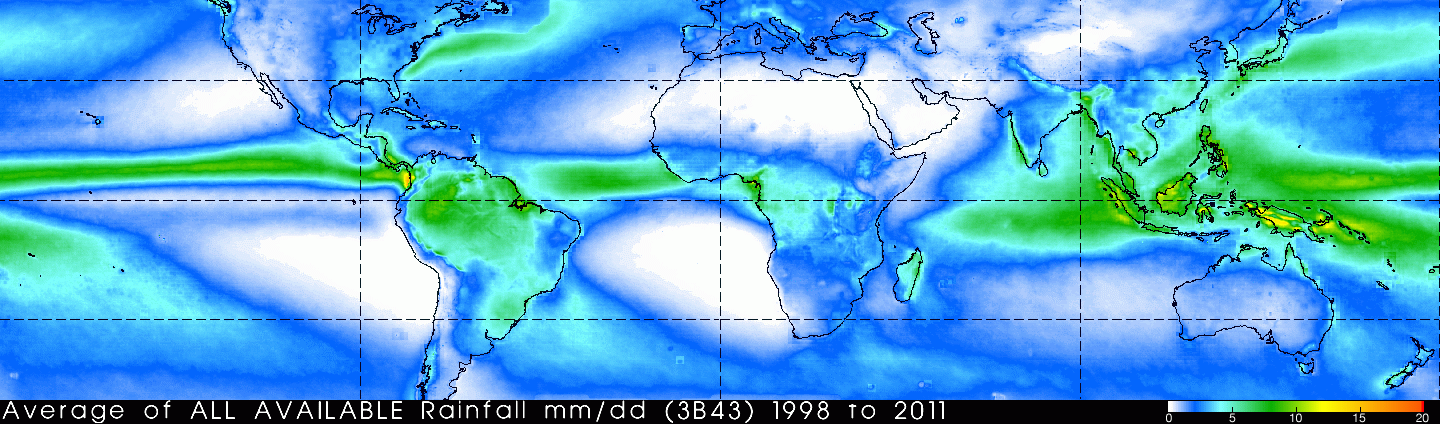

In [10]:

from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/TRMM.png') 

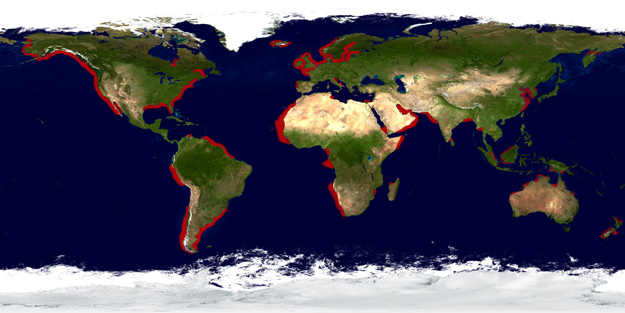

In [11]:
from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/EarthMap_upwelling_red.jpg') 

The SSTs seem to be overestimated where there is high precip. I hypothesis that this is due to the model not being able to loose enough heat (and maybe gaining too much heat) where there is high levels of high cloud. I plan to address this be prescribing aspects of the surface radiation from the forcing dataset rather than allwing s2p3 to calcuate these thinsg based on cloud amount.

### Note, crw SST is night time avg, model is daily mean

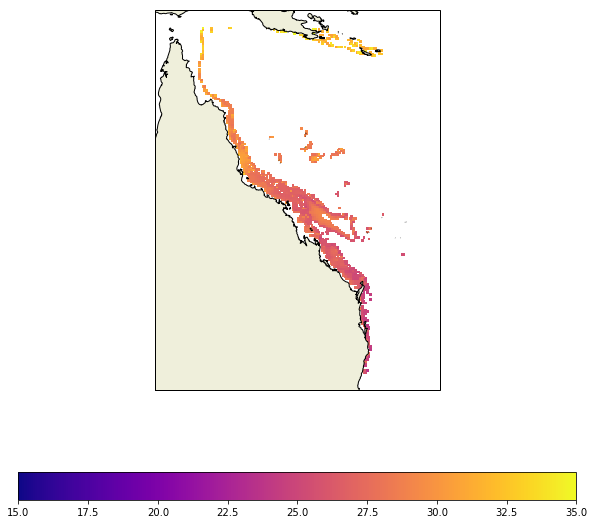

In [12]:
lon_west = 142.0
lon_east = 157.0
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=15,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

In [13]:
obs_cube_region = extract_region(obs_cube.copy(),lon_west,lon_east,lat_south,lat_north)
cube_region_model = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

print obs_cube_region.coord('longitude').points
print cube_region_model.coord('longitude').points

[ 142.0249939   142.07499695  142.125       142.17500305  142.2250061
  142.2749939   142.32499695  142.375       142.42500305  142.4750061
  142.5249939   142.57499695  142.625       142.67500305  142.7250061
  142.7749939   142.82499695  142.875       142.92500305  142.9750061
  143.0249939   143.07499695  143.125       143.17500305  143.2250061
  143.2749939   143.32499695  143.375       143.42500305  143.4750061
  143.5249939   143.57499695  143.625       143.67500305  143.7250061
  143.7749939   143.82499695  143.875       143.92500305  143.9750061
  144.0249939   144.07499695  144.125       144.17500305  144.2250061
  144.2749939   144.32499695  144.375       144.42500305  144.4750061
  144.5249939   144.57499695  144.625       144.67500305  144.7250061
  144.7749939   144.82499695  144.875       144.92500305  144.9750061
  145.0249939   145.07499695  145.125       145.17500305  145.2250061
  145.2749939   145.32499695  145.375       145.42500305  145.4750061
  145.5249939   145.

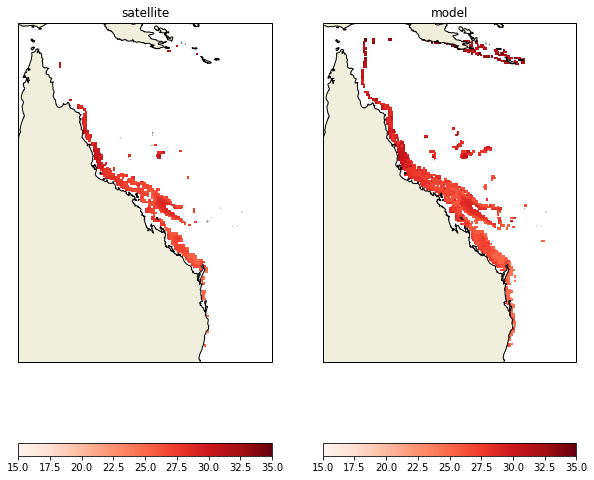

In [14]:


lon_west = 142
lon_east = 157
lat_south = -30.0
lat_north = -10.0

obs_cube_region = extract_region(obs_cube.copy(),lon_west,lon_east,lat_south,lat_north)
cube_region_model = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_model.coord('latitude').coord_system = obs_cube_region.coord('latitude').coord_system
cube_region_model.coord('longitude').coord_system =obs_cube_region.coord('longitude').coord_system

obs_cube_region_regridded = cube_region_model.regrid(obs_cube_region, iris.analysis.Linear())
# obs_cube_region_regridded.data.mask = cube_region_model.data.mask


cube_region_data = obs_cube_region_regridded.data
lat = obs_cube_region_regridded.coord('latitude').points
lon = obs_cube_region_regridded.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=15,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')
plt.colorbar(p,orientation='horizontal')
plt.title('satellite')

lon_west = 142.0
lon_east = 157.0
lat_south = -30.0
lat_north = -10.0


cube_region_data = cube_region_model.data
lat = cube_region_model.coord('latitude').points
lon = cube_region_model.coord('longitude').points
ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=15,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')
plt.title('model')

plt.colorbar(p,orientation='horizontal')

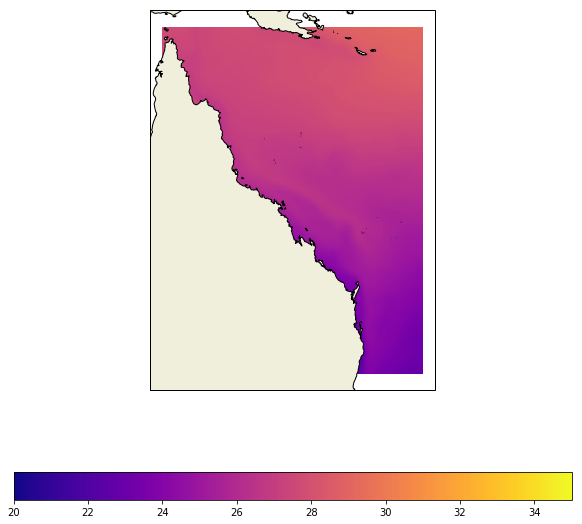

In [15]:
lon_west = 142+360.0
lon_east = 157+360.0
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube.copy(),lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


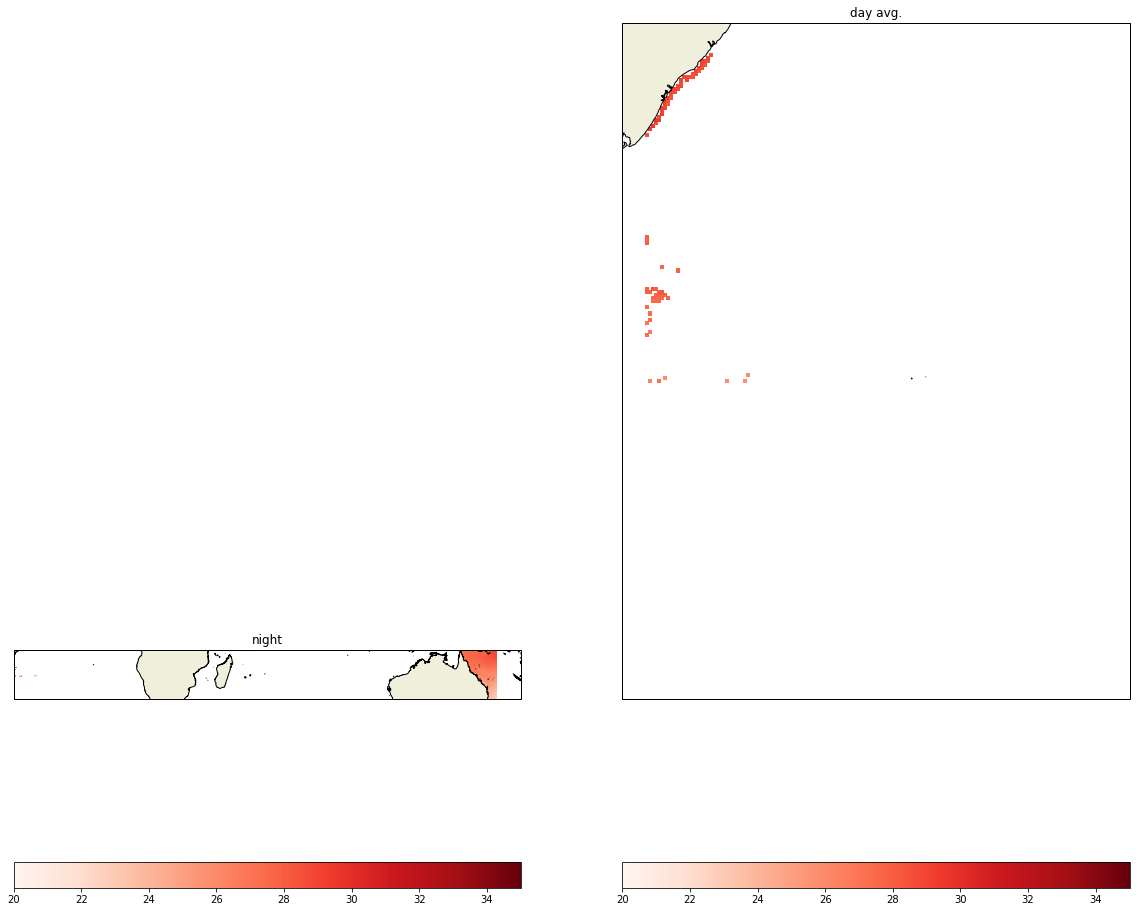

In [16]:
lon_west = 142+360
lon_east = 157+360
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = 142+180
lon_east = 157+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

p = ax.contour(lon, lat,cube_region_data,levels=[20],
                transform=ccrs.PlateCarree(),colors='k')



p = ax.pcolormesh(lon, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')
plt.colorbar(p,orientation='horizontal')

plt.title('night')


####

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points


p = ax.pcolormesh(lon, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.title('day avg.')

plt.colorbar(p,orientation='horizontal')

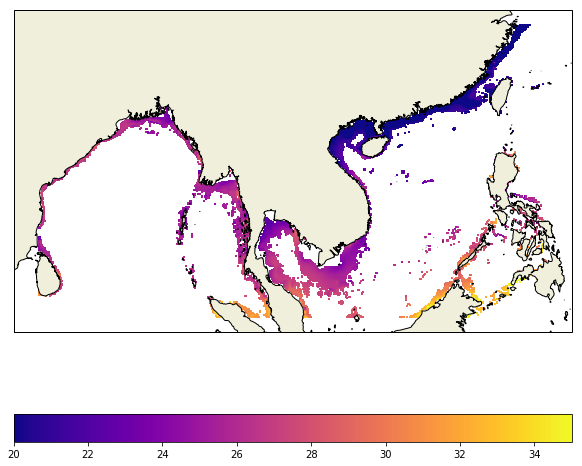

In [17]:
lon_west = -100+180
lon_east = -55+180
lat_south = 4.0
lat_north = 34.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')


plt.colorbar(p,orientation='horizontal')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/caribbean_s2p3.png')
plt.show()


# regridded comparison

Basicsally regions below cloud are too hot. Regions not below cloud are too cold... This could be that the thermal radiation is actually jsut being absiorbed and a large fraction re-radiated by the skin https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2017JC013351 so we could scale the downward IR by e.g. 0.95. The rest could be too cool because the emissivoty is too high or mixing too strong?

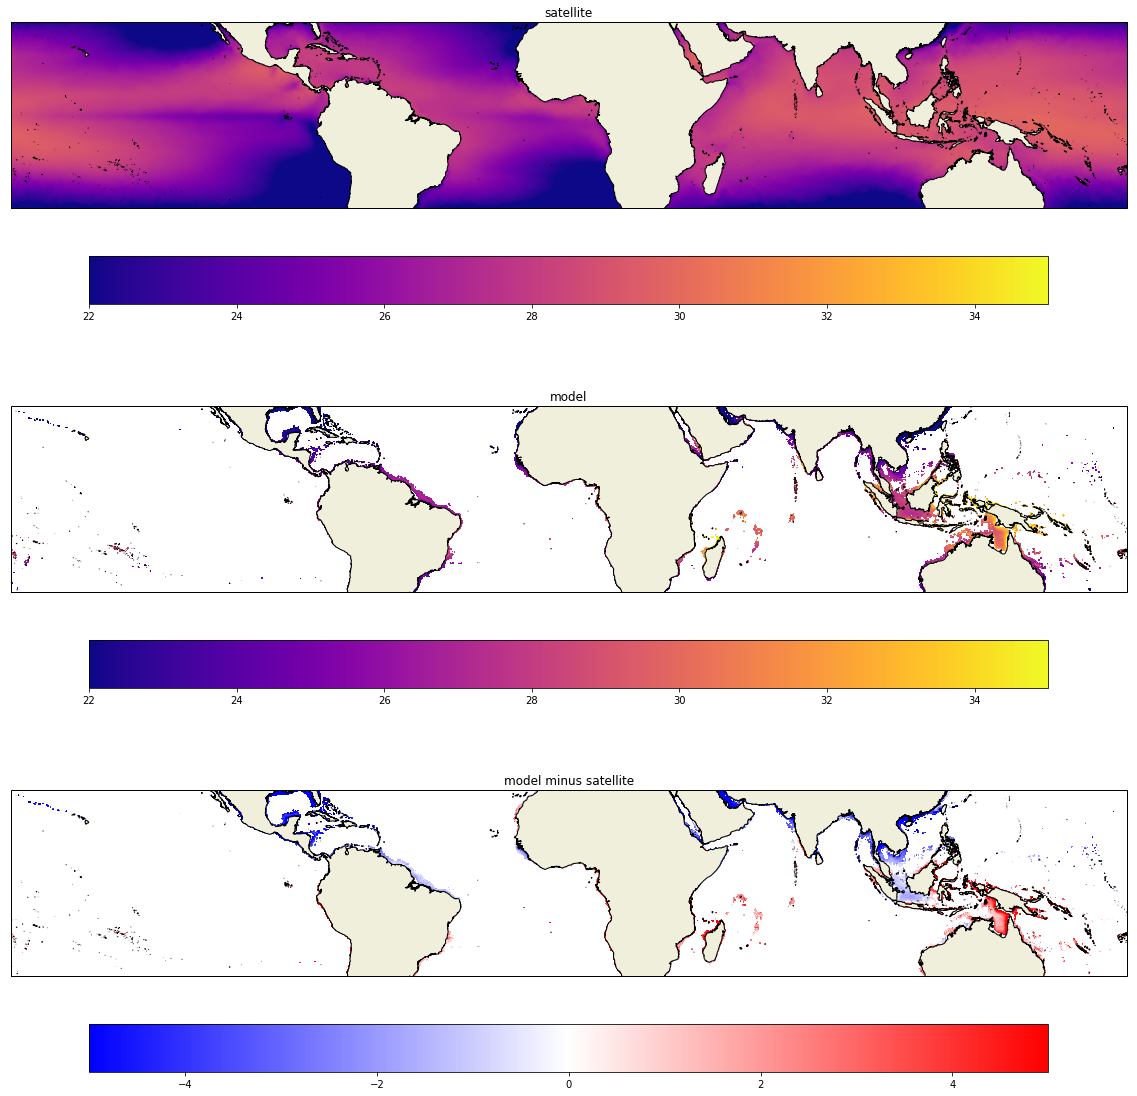

In [35]:
lon_west = 0
lon_east = 360
lat_south = -30.0
lat_north = 30.0



c_model = extract_region(cube,lon_west,lon_east,lat_south,lat_north)
c_model.coord('longitude').points = c_model.coord('longitude').points + 180

c_crw_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_crw_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system =c_crw_region.coord('longitude').coord_system

c_crw_region_regridded = c_crw_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


crw_data = c_crw_region_regridded.data
lat_crw = c_crw_region_regridded.coord('latitude').points
lon_crw = c_crw_region_regridded.coord('longitude').points

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p1 = ax1.pcolormesh(lon_crw, lat_model,crw_data,
                transform=ccrs.PlateCarree(),vmin=22,vmax=35,
                cmap='plasma')
plt.colorbar(p1,orientation='horizontal')


ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree())
p2 = ax2.pcolormesh(lon_model+180, lat_model,model_data,
                transform=ccrs.PlateCarree(),vmin=22,vmax=35,
                cmap='plasma')
plt.colorbar(p2,orientation='horizontal')

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree())

p3 = ax3.pcolormesh(lon_crw, lat_model,np.roll(model_data,np.shape(model_data)[1]/2,axis=1) - crw_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='bwr')
plt.colorbar(p3,orientation='horizontal')

ax1.add_feature(land_10m, edgecolor='k')
ax2.add_feature(land_10m, edgecolor='k')
ax3.add_feature(land_10m, edgecolor='k')

ax1.title.set_text('satellite')
ax2.title.set_text('model')
ax3.title.set_text('model minus satellite')


# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/globaltropics.svg')
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/globaltropics.pdf')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/proposals/GlobalPartnershipsSeedcornFund2020/figures/globaltropics.png',dpi=600)


plt.show()

basically we've got to the point where the areas whefre it is hot of cold relate to warm/cold currnets, so we can be happy with teh background, and factory tthat in

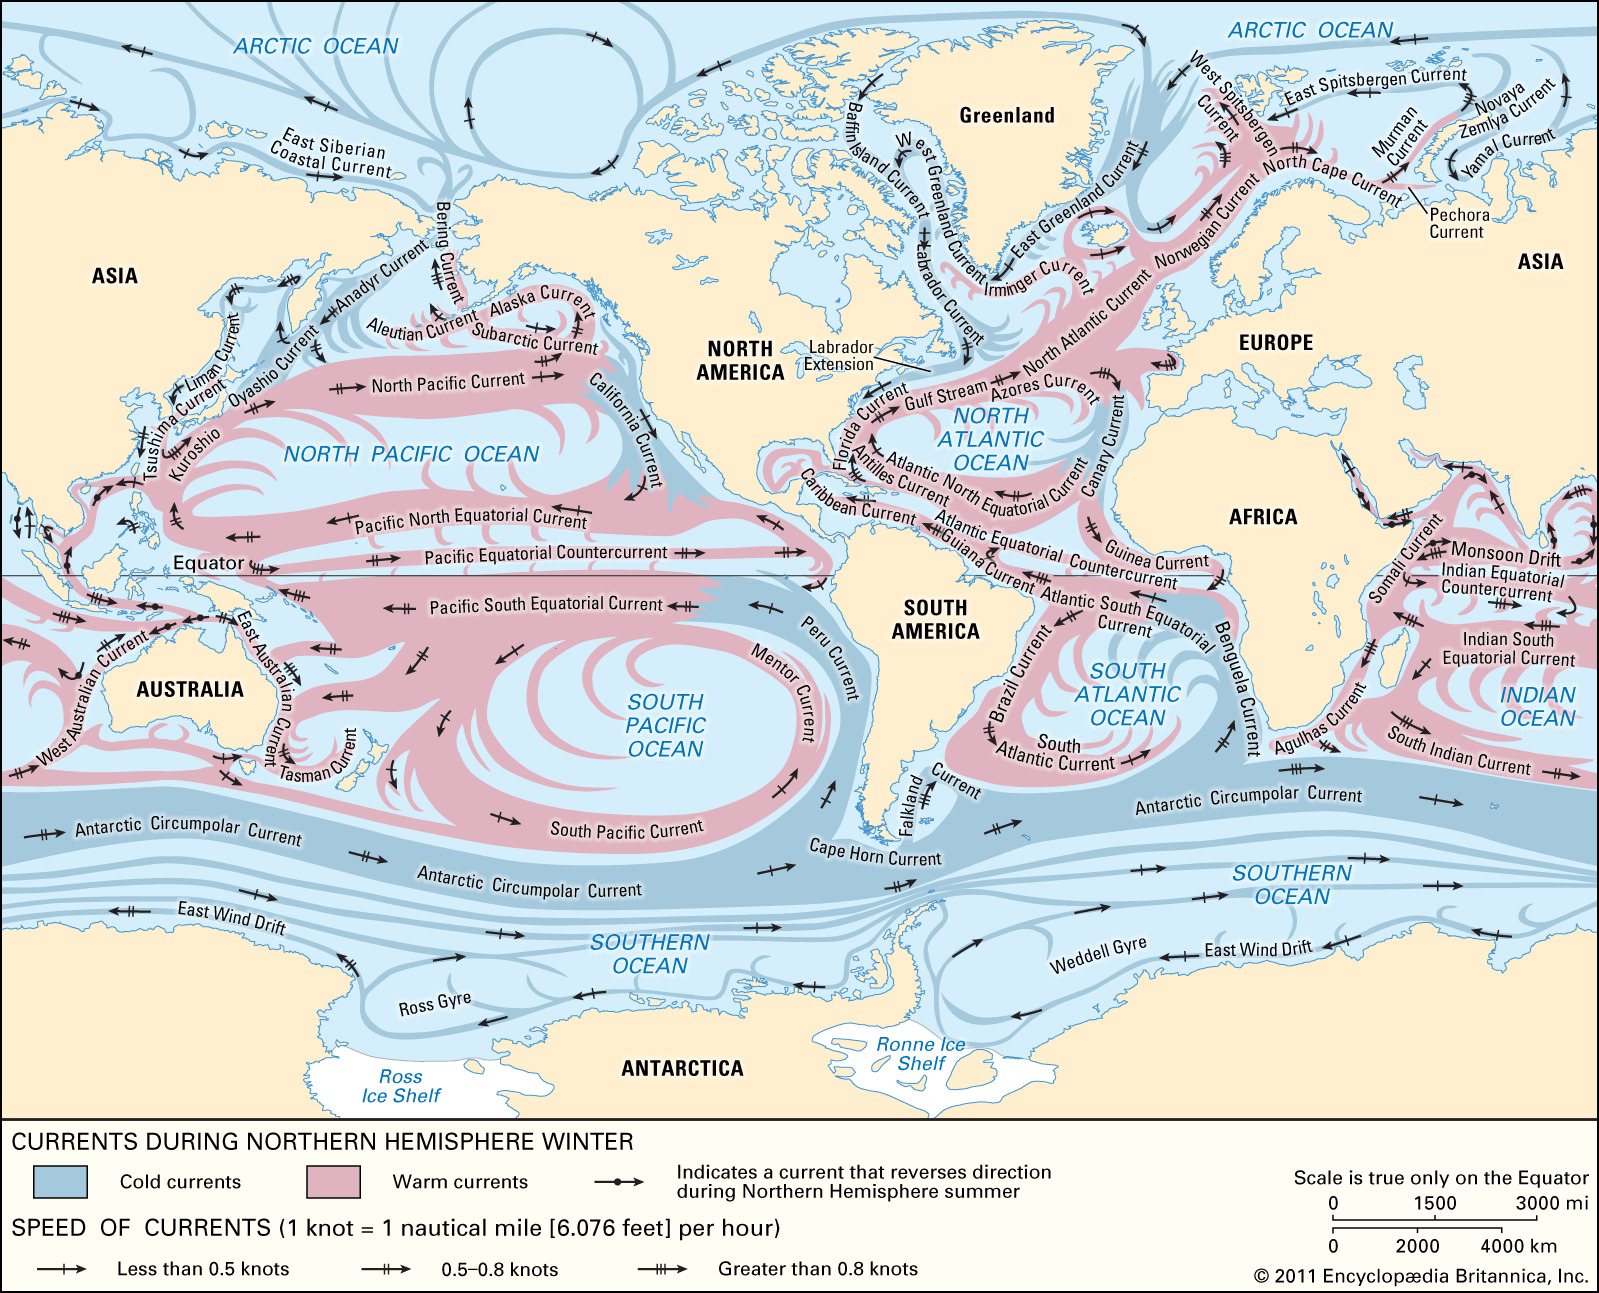

In [19]:
from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/ocean-systems-world.jpg') 

## Plot with depth

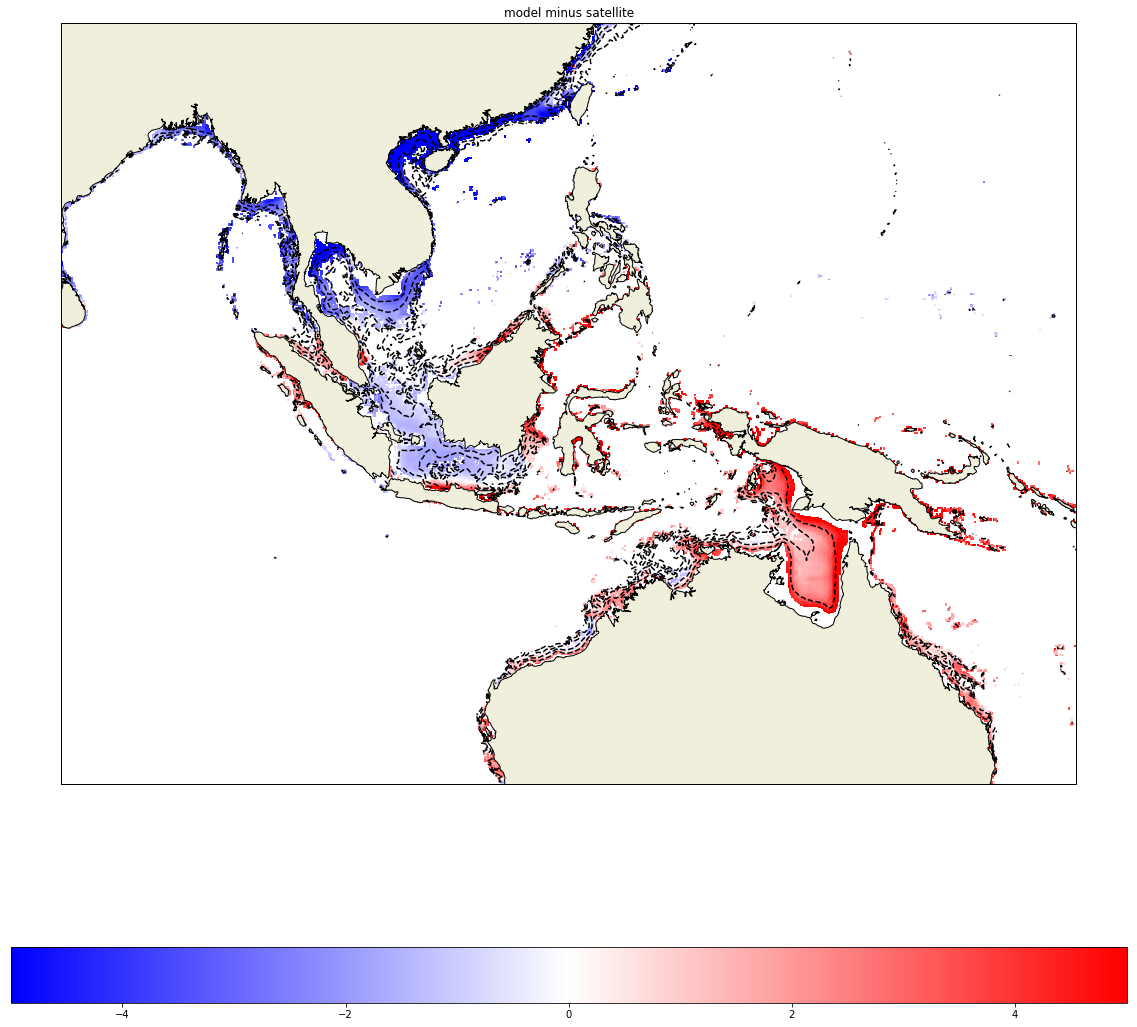

In [20]:
bathy_file = '/Users/ph290/Downloads/ETOPO1_Bed_g_gmt4_low_res.nc'
bathy_cube = iris.load_cube(bathy_file)
bathy_cube.data = np.ma.masked_where(bathy_cube.data >= 0.0,bathy_cube.data)
bathy_cube.data = np.ma.masked_where(bathy_cube.data < -100.0,bathy_cube.data)



lon_west = 0
lon_east = 360
lat_south = -30.0
lat_north = 30.0

bathy_cube = extract_region(bathy_cube,lon_west,lon_east,lat_south,lat_north)

bathy_data = bathy_cube.data
lat_bathy = bathy_cube.coord('latitude').points
lon_bathy = bathy_cube.coord('longitude').points

lon_west2 = 80
lon_east2 = 160
lat_south2 = -30
lat_north2 = 30

plt.close('all')
fig = plt.figure(figsize=(20, 20))
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west2, lon_east2, lat_south2, lat_north2), crs=ccrs.PlateCarree())

# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')

p3 = ax3.pcolormesh(lon_crw, lat_model,np.roll(model_data,np.shape(model_data)[1]/2,axis=1) - crw_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='bwr')
plt.colorbar(p3,orientation='horizontal')


ax3.add_feature(land_10m, edgecolor='k')

ax3.title.set_text('model minus satellite')



plt.show()

# GBR timeseries comparison

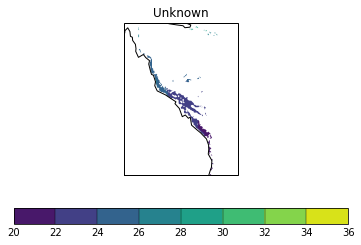

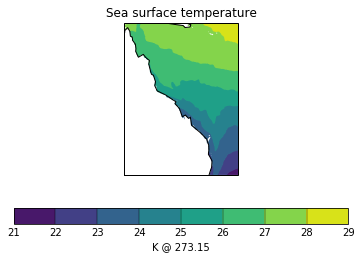

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/analysis/cartography.py:376: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/analysis/cartography.py:368: UserWarning: Assuming spherical earth from ellipsoid.
  warnings.warn("Assuming spherical earth from ellipsoid.")


In [21]:
# lon_west = -100
# lon_east = -55
# lat_south = 4.0
# lat_north = 30.0
lon_west = 142.0
lon_east = 157.0
lat_south = -30.0
lat_north = -10.0


cube_all_region = extract_region(cube_all,lon_west,lon_east,lat_south,lat_north)


qplt.contourf(cube_all_region[5])
plt.gca().coastlines()
plt.show()
obs_cube_all_region = extract_region(obs_cube_all,lon_west,lon_east,lat_south,lat_north)

qplt.contourf(obs_cube_all_region[5])
plt.gca().coastlines()
plt.show()

cube_all_region_area_avg = area_avg(cube_all_region)
obs_cube_all_region_area_avg = area_avg(obs_cube_all_region)

In [22]:
obs_cube_all_region.coord('latitude').coord_system = cube_all_region.coord('latitude').coord_system
obs_cube_all_region.coord('longitude').coord_system =cube_all_region.coord('longitude').coord_system

cube_all_region_regridded = cube_all_region.regrid(obs_cube_all_region, iris.analysis.Linear())
obs_cube_all_region.data.mask = cube_all_region_regridded.data.mask


obs_cube_all_region.data[np.where(obs_cube_all_region.data < -20.0)] = obs_cube_all_region.data.fill_value
obs_cube_all_region.data = np.ma.masked_where(obs_cube_all_region.data == obs_cube_all_region.data.fill_value, obs_cube_all_region.data)

cube_all_region_regridded.data[np.where(cube_all_region_regridded.data < -20.0)] = cube_all_region_regridded.data.fill_value
cube_all_region_regridded.data[np.where(cube_all_region_regridded.data > 40.0)] = cube_all_region_regridded.data.fill_value
cube_all_region_regridded.data = np.ma.masked_where(cube_all_region_regridded.data == cube_all_region_regridded.data.fill_value, cube_all_region_regridded.data)

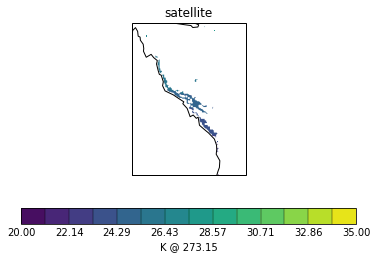

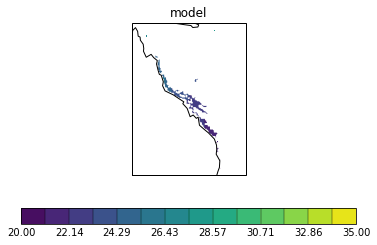

In [23]:
qplt.contourf(obs_cube_all_region[5],np.linspace(20,35,15))
plt.gca().coastlines()
plt.title('satellite')
plt.show()

qplt.contourf(cube_all_region_regridded[5],np.linspace(20,35,15))
plt.gca().coastlines()
plt.title('model')
plt.show()



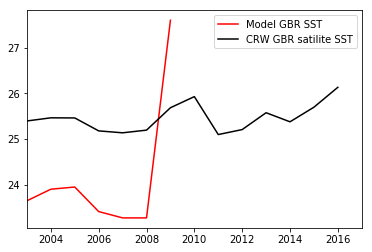

In [24]:

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

cube_all_region_area_avg = area_avg(cube_all_region_regridded)
obs_cube_all_region_area_avg = area_avg(obs_cube_all_region)

plotting_range = [2002,2017]
cube_all_region_area_avg = select_range(cube_all_region_area_avg, plotting_range)
obs_cube_all_region_area_avg = select_range(obs_cube_all_region_area_avg, plotting_range)

   
# fig, ax1 = plt.subplots()

# ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')

# # ax2 = ax1.twinx() 

# ax.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')

# ax1.set_xlim([2003,2017])
# plt.legend()
# plt.show()


fig, ax1 = plt.subplots()

ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')

# ax2 = ax1.twinx() 

ax1.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')

ax1.set_xlim([2003,2017])
plt.legend()
plt.show()



## Caribbean timeseries comparison

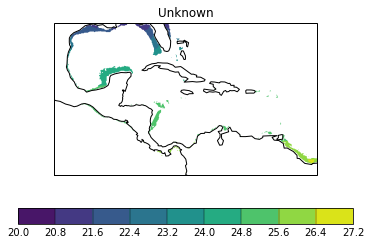

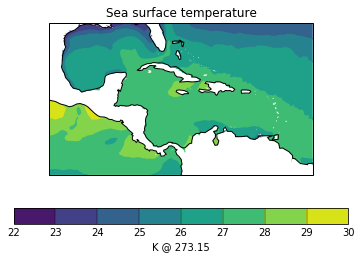

In [25]:
lon_west = -100
lon_east = -55
lat_south = 4.0
lat_north = 30.0


cube_all_region = extract_region(cube_all,lon_west,lon_east,lat_south,lat_north)


qplt.contourf(cube_all_region[5])
plt.gca().coastlines()
plt.show()
obs_cube_all_region = extract_region(obs_cube_all,lon_west,lon_east,lat_south,lat_north)

qplt.contourf(obs_cube_all_region[5])
plt.gca().coastlines()
plt.show()

cube_all_region_area_avg = area_avg(cube_all_region)
obs_cube_all_region_area_avg = area_avg(obs_cube_all_region)

In [26]:
obs_cube_all_region.coord('latitude').coord_system = cube_all_region.coord('latitude').coord_system
obs_cube_all_region.coord('longitude').coord_system =cube_all_region.coord('longitude').coord_system

cube_all_region_regridded = cube_all_region.regrid(obs_cube_all_region, iris.analysis.Linear())
obs_cube_all_region.data.mask = cube_all_region_regridded.data.mask


obs_cube_all_region.data[np.where(obs_cube_all_region.data < -20.0)] = obs_cube_all_region.data.fill_value
obs_cube_all_region.data = np.ma.masked_where(obs_cube_all_region.data == obs_cube_all_region.data.fill_value, obs_cube_all_region.data)

cube_all_region_regridded.data[np.where(cube_all_region_regridded.data < -20.0)] = cube_all_region_regridded.data.fill_value
cube_all_region_regridded.data[np.where(cube_all_region_regridded.data > 40.0)] = cube_all_region_regridded.data.fill_value
cube_all_region_regridded.data = np.ma.masked_where(cube_all_region_regridded.data == cube_all_region_regridded.data.fill_value, cube_all_region_regridded.data)

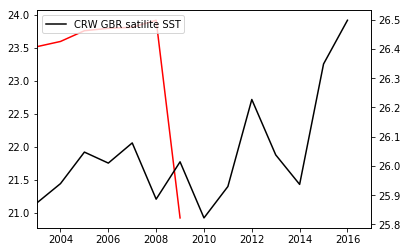

In [27]:

def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

cube_all_region_area_avg = area_avg(cube_all_region_regridded)
obs_cube_all_region_area_avg = area_avg(obs_cube_all_region)

plotting_range = [2002,2017]
cube_all_region_area_avg = select_range(cube_all_region_area_avg, plotting_range)
obs_cube_all_region_area_avg = select_range(obs_cube_all_region_area_avg, plotting_range)

   
fig, ax1 = plt.subplots()

ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')

ax2 = ax1.twinx() 

ax2.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')

ax1.set_xlim([2003,2017])
plt.legend()
plt.show()



# Notes

I seemed to have downloade drhum at pressure level 975 rather than 1000 so it does not correspond to the surface, which is what i presumably need for latant heat flux. Re-downloading now

Turbidity absorption, could be parameterised with winds…

Top layer 10-20cm thick would be good - shadow thermocline would be or order 10-20cm. Have it as the same thickness specially 

Coral temp is average of any nighttime data but that should give a reasonable daily avg

CCI is 10am which is a decent daily average

Ongala reck data would be a good one to validate against,

Do runs from mid 2000s - good SST data

1950sish-2100 - 3D 

Need to s2p3 reanalysis back to 1950ish - ERA5 will go to then in a few months.

2002-2006 is William’s best SST data. Do runs from 2000.
William can provide this or can do this - it uses coraltemp4 which has not been released yet

Play with the drag coefficient to make the SSTs look good… then look at the spatial pattern of drag coefficients to think about whether they make physical sense